In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('lending-club-data.csv')
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


## create target column

In [3]:
data['safe_loans'] = data['bad_loans'].apply( lambda x: +1 if x==0 else -1 )
data.drop('bad_loans',axis=1,inplace=True)

In [5]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [6]:
data = data[[target] + features].dropna()

In [10]:
with open('module-8-assignment-1-train-idx.json','r') as f:
    train_idx = json.load(f)
with open('module-8-assignment-1-validation-idx.json','r') as f:
    test_idx = json.load(f)

In [11]:
train = data.iloc[train_idx]
test = data.iloc[test_idx]
print(train.shape)
print(test.shape)

(37219, 25)
(9284, 25)


## One hot encoding

In [13]:
df = pd.get_dummies(data)
train_ = pd.get_dummies(train)
test_ = pd.get_dummies(test)

In [16]:
train_.shape

(37219, 45)

## Gradient boosted tree classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
x_train = train_.iloc[:,1:]
y_train = train_.iloc[:,0]
x_test = test_.iloc[:,1:]
y_test = test.iloc[:,0]

In [26]:
model_5 = GradientBoostingClassifier(n_estimators=5,max_depth=6)
model_5.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Predictions

In [27]:
validation_safe_loans = test_[test_[target] == 1]
validation_risky_loans = test_[test_[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
x = sample_validation_data.iloc[:,1:]
y = sample_validation_data.iloc[:,0]
pred = model_5.predict(x)
print(pred)
print(list(y))

[ 1  1 -1  1]
[1, 1, -1, -1]


## Predict probability

In [31]:
model_5.predict_proba(x)

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

## Evaluation

In [32]:
score_5 = model_5.score(x_test,y_test)
score_5

0.6614605773373546

In [35]:
def costcalc(pred,label):
    false_pos=0
    false_neg=0
    for i in range(len(pred)):
        if(pred[i]==-1 and label[i]==1):
            false_neg+=1
        elif(pred[i]==1 and label[i]==-1):
            false_pos+=1
    print(false_pos)
    print(false_neg)

In [36]:
pred = model_5.predict(x_test)
label = list(y_test)
costcalc(pred,label)

1652
1491


## Comparison with decision trees

In [40]:
## single decision tree
cost = 10000 * 1936  + 20000 * 1503
cost

49420000

In [41]:
## boosted tree
cost = 10000 * 1491  + 20000 * 1652
cost

47950000

## Most pos and neg loans

In [54]:
pred = model_5.predict(x_test)
prob = model_5.predict_proba(x_test)
print(prob)
prob = prob[:,1]

[[0.53807792 0.46192208]
 [0.39591639 0.60408361]
 [0.52012758 0.47987242]
 ...
 [0.53530977 0.46469023]
 [0.52280924 0.47719076]
 [0.53807792 0.46192208]]


In [55]:
x_test['pred'] = pred
x_test['prob'] = prob

In [56]:
x_test.head()

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,pred,prob
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,-1,0.461922
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.604084
60,0.4,0,5,12.48,3.57024,0.0,1.0,3.0,1,1,...,0,0,0,0,0,1,0,0,-1,0.479872
93,0.4,0,11,23.18,14.70090,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,-1,0.406924
132,0.2,0,3,7.83,11.04860,0.0,1.0,2.0,1,1,...,0,0,0,0,0,0,0,0,1,0.547199


In [61]:
x_test = x_test.sort_values(by='prob',ascending=False)
x = x_test.head()

In [65]:
cols = ['grade_A', 'grade_B','grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G']
x.loc[:,cols]

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
8021,1,0,0,0,0,0,0
21899,1,0,0,0,0,0,0
10689,1,0,0,0,0,0,0
68973,1,0,0,0,0,0,0
16636,1,0,0,0,0,0,0


In [66]:
x = x_test.tail()
x.loc[:,cols]

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
84921,0,0,1,0,0,0,0
101746,0,0,0,1,0,0,0
27502,0,0,1,0,0,0,0
58794,0,0,1,0,0,0,0
84508,0,0,1,0,0,0,0


## Effects of adding more trees

In [69]:
x_train = train_.iloc[:,1:]
y_train = train_.iloc[:,0]
x_test = test_.iloc[:,1:]
y_test = test.iloc[:,0]

In [67]:
model_5 = GradientBoostingClassifier(n_estimators=5,max_depth=6)
model_5.fit(x_train,y_train)

model_10 = GradientBoostingClassifier(n_estimators=10,max_depth=6)
model_10.fit(x_train,y_train)

model_50 = GradientBoostingClassifier(n_estimators=50,max_depth=6)
model_50.fit(x_train,y_train)

model_100 = GradientBoostingClassifier(n_estimators=100,max_depth=6)
model_100.fit(x_train,y_train)

model_200 = GradientBoostingClassifier(n_estimators=200,max_depth=6)
model_200.fit(x_train,y_train)

model_500 = GradientBoostingClassifier(n_estimators=500,max_depth=6)
model_500.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
### Accuracy on test data
score_5 = model_5.score(x_test,y_test)
score_10 = model_10.score(x_test,y_test)
score_50 = model_50.score(x_test,y_test)
score_100 = model_100.score(x_test,y_test)
score_200 = model_200.score(x_test,y_test)
score_500 = model_500.score(x_test,y_test)
print(score_5)
print(score_10)
print(score_50)
print(score_100)
print(score_200)
print(score_500)

0.6614605773373546
0.6653382162860836
0.684510986643688
0.6892503231365791
0.6896811719086601
0.6898965962947006


## Plot the training and validation error vs. number of trees

In [71]:
## error = 1 - accuracy

In [76]:
## classification t_error on train data

score_5 = model_5.score(x_train,y_train)
score_10 = model_10.score(x_train,y_train)
score_50 = model_50.score(x_train,y_train)
score_100 = model_100.score(x_train,y_train)
score_200 = model_200.score(x_train,y_train)
score_500 = model_500.score(x_train,y_train)

t_err_5 = 1 - score_5
t_err_10 = 1 - score_10
t_err_50 = 1 - score_50
t_err_100 = 1 - score_100
t_err_200 = 1 - score_200
t_err_500 = 1 - score_500

In [77]:
## classification v_error on test data

score_5 = model_5.score(x_test,y_test)
score_10 = model_10.score(x_test,y_test)
score_50 = model_50.score(x_test,y_test)
score_100 = model_100.score(x_test,y_test)
score_200 = model_200.score(x_test,y_test)
score_500 = model_500.score(x_test,y_test)

v_err_5 = 1 - score_5
v_err_10 = 1 - score_10
v_err_50 = 1 - score_50
v_err_100 = 1 - score_100
v_err_200 = 1 - score_200
v_err_500 = 1 - score_500

In [78]:
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [79]:
train_errors = [t_err_5, t_err_10, t_err_50, t_err_100, t_err_200, t_err_500]
val_errors = [v_err_5, v_err_10, v_err_50, v_err_100, v_err_200, v_err_500]

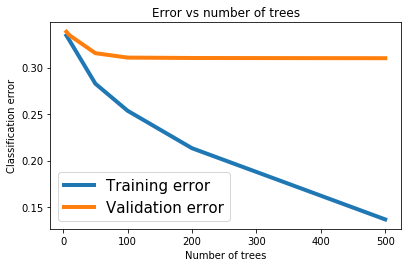

In [81]:
plt.plot([5, 10, 50, 100, 200, 500], train_errors, linewidth=4.0, label='Training error')
plt.plot([5, 10, 50, 100, 200, 500], val_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')